In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pyod.models.knn import KNN

normal_path = "features/S01/1/Normal/c_data"
relay_path  = "features/S01/1/Relay/c_data"

with h5py.File("datasets/features_S01_combined.h5", "r") as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49997, n_norm))
    dataset_relay  = np.zeros((49998, n_relay))

    for i in range(49997):
        try:
            dataset_normal[i] = normal_group[str(i)][:]
        except KeyError:
            continue

    for i in range(49998):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

scalerMinMax = MinMaxScaler()
scalerStandard = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]
X_test_relay          = dataset_relay[47500:]

scalerMinMax.fit(X_train)
X_train_scaled_minmax       = scalerMinMax.transform(X_train)
X_test_norm_scaled_minmax   = scalerMinMax.transform(X_test_normal)
X_test_relay_scaled_minmax  = scalerMinMax.transform(X_test_relay)

scalerStandard.fit(X_train)
X_train_scaled_standard        = scalerStandard.transform(X_train)
X_test_norm_scaled_standard    = scalerStandard.transform(X_test_normal)
X_test_relay_scaled_standard   = scalerStandard.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled_minmax = np.vstack((X_test_norm_scaled_minmax, X_test_relay_scaled_minmax))
X_test_combined_scaled_standard = np.vstack((X_test_norm_scaled_standard, X_test_relay_scaled_standard))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

n neighbors: 10
metric: l2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.72      2497
       Relay       0.96      0.22      0.36      2498

    accuracy                           0.61      4995
   macro avg       0.76      0.61      0.54      4995
weighted avg       0.76      0.61      0.54      4995



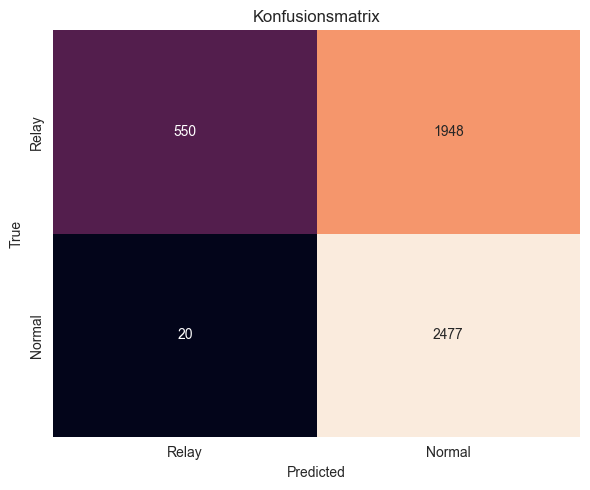

n neighbors: 10
metric: cityblock

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.72      2497
       Relay       0.97      0.22      0.36      2498

    accuracy                           0.61      4995
   macro avg       0.76      0.61      0.54      4995
weighted avg       0.76      0.61      0.54      4995



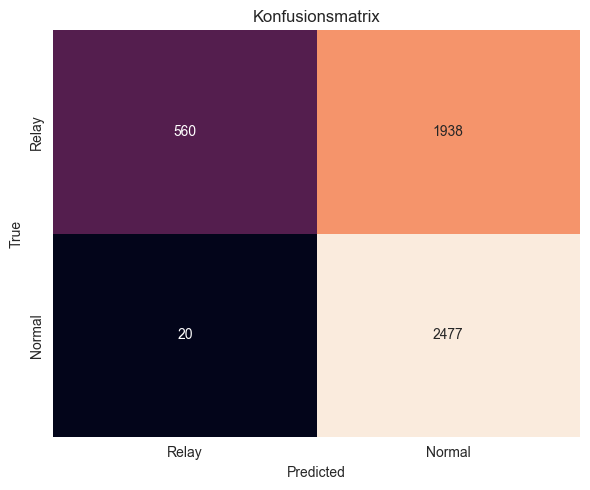

n neighbors: 10
metric: l1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.72      2497
       Relay       0.97      0.22      0.36      2498

    accuracy                           0.61      4995
   macro avg       0.76      0.61      0.54      4995
weighted avg       0.76      0.61      0.54      4995



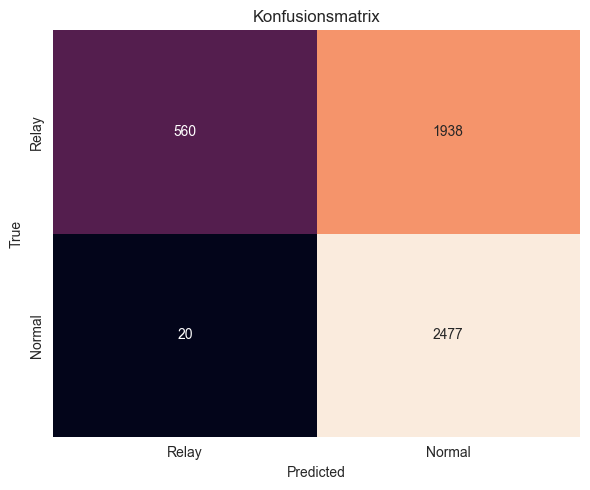

n neighbors: 10
metric: euclidean

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.72      2497
       Relay       0.96      0.22      0.36      2498

    accuracy                           0.61      4995
   macro avg       0.76      0.61      0.54      4995
weighted avg       0.76      0.61      0.54      4995



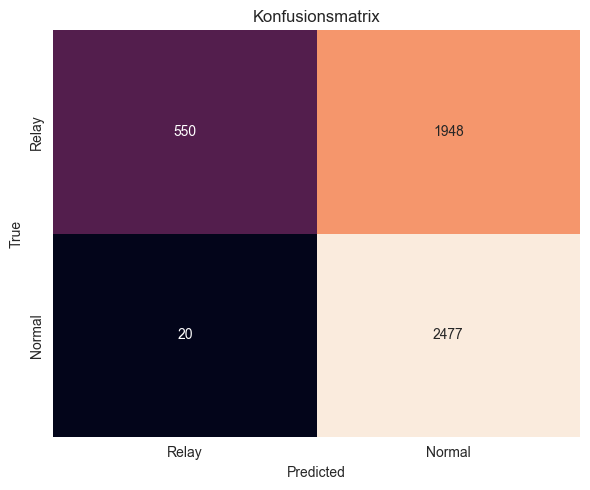

n neighbors: 10
metric: manhattan

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.72      2497
       Relay       0.97      0.22      0.36      2498

    accuracy                           0.61      4995
   macro avg       0.76      0.61      0.54      4995
weighted avg       0.76      0.61      0.54      4995



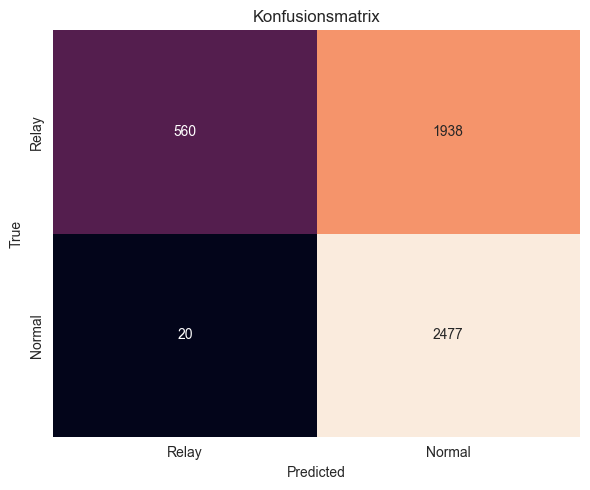

n neighbors: 3
metric: l2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.55      0.99      0.71      2497
       Relay       0.95      0.20      0.33      2498

    accuracy                           0.60      4995
   macro avg       0.75      0.60      0.52      4995
weighted avg       0.75      0.60      0.52      4995



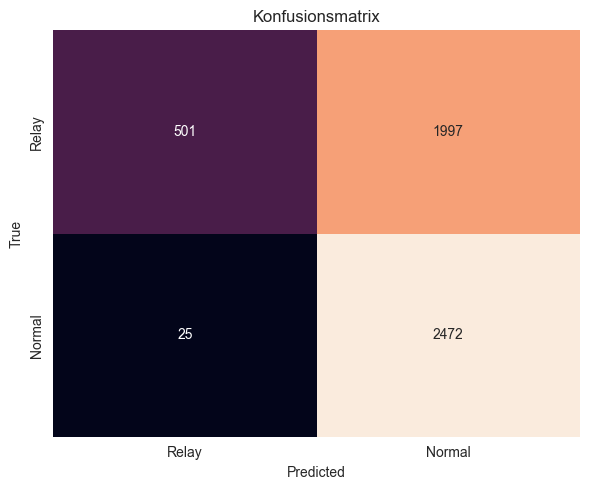

n neighbors: 3
metric: cityblock

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.71      2497
       Relay       0.96      0.21      0.34      2498

    accuracy                           0.60      4995
   macro avg       0.76      0.60      0.53      4995
weighted avg       0.76      0.60      0.53      4995



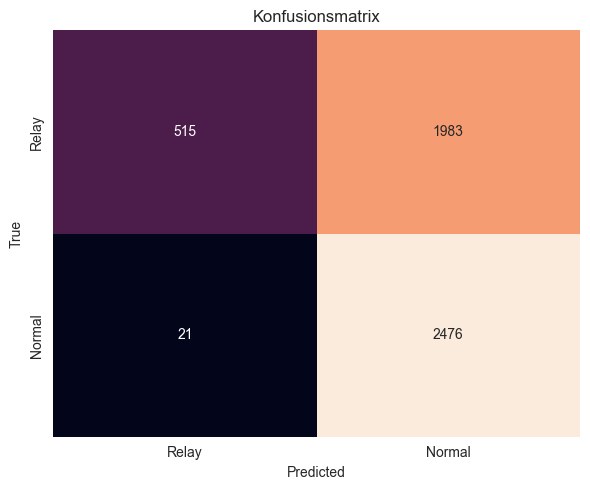

n neighbors: 3
metric: l1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.71      2497
       Relay       0.96      0.21      0.34      2498

    accuracy                           0.60      4995
   macro avg       0.76      0.60      0.53      4995
weighted avg       0.76      0.60      0.53      4995



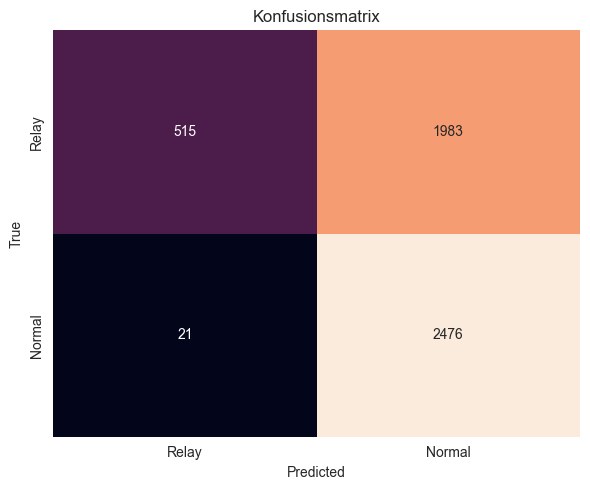

n neighbors: 3
metric: euclidean

Classification Report:
               precision    recall  f1-score   support

      Normal       0.55      0.99      0.71      2497
       Relay       0.95      0.20      0.33      2498

    accuracy                           0.60      4995
   macro avg       0.75      0.60      0.52      4995
weighted avg       0.75      0.60      0.52      4995



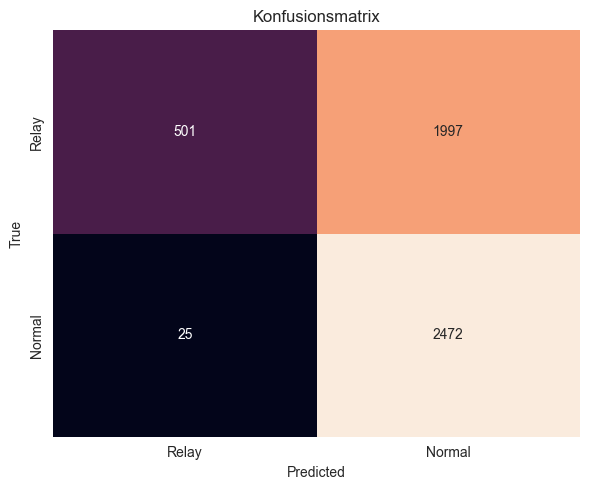

n neighbors: 3
metric: manhattan

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.71      2497
       Relay       0.96      0.21      0.34      2498

    accuracy                           0.60      4995
   macro avg       0.76      0.60      0.53      4995
weighted avg       0.76      0.60      0.53      4995



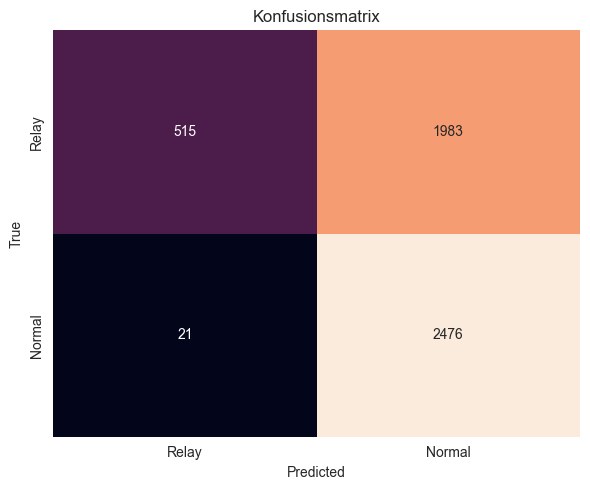

n neighbors: 50
metric: l2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.72      2497
       Relay       0.96      0.22      0.36      2498

    accuracy                           0.61      4995
   macro avg       0.76      0.61      0.54      4995
weighted avg       0.76      0.61      0.54      4995



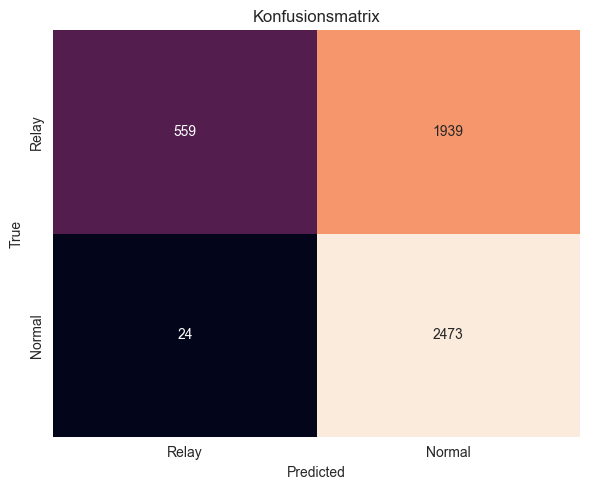

n neighbors: 50
metric: cityblock

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.72      2497
       Relay       0.96      0.23      0.37      2498

    accuracy                           0.61      4995
   macro avg       0.76      0.61      0.54      4995
weighted avg       0.76      0.61      0.54      4995



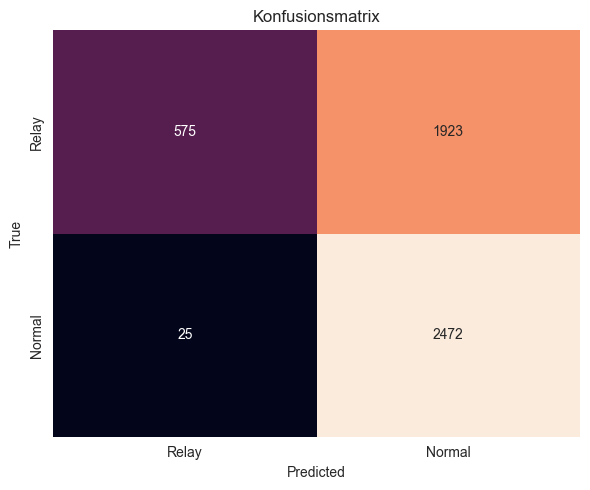

n neighbors: 50
metric: l1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.72      2497
       Relay       0.96      0.23      0.37      2498

    accuracy                           0.61      4995
   macro avg       0.76      0.61      0.54      4995
weighted avg       0.76      0.61      0.54      4995



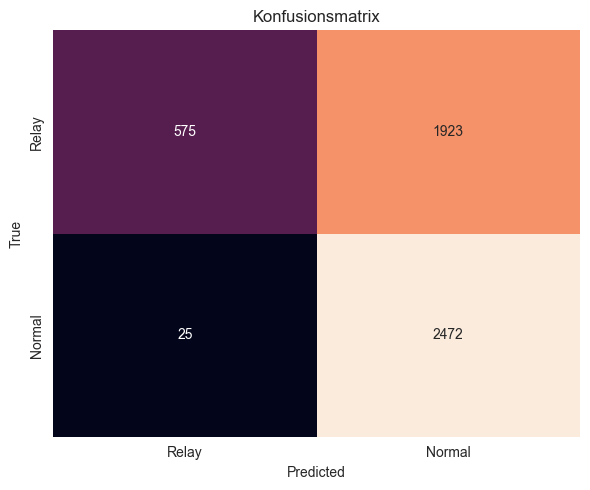

n neighbors: 50
metric: euclidean

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.72      2497
       Relay       0.96      0.22      0.36      2498

    accuracy                           0.61      4995
   macro avg       0.76      0.61      0.54      4995
weighted avg       0.76      0.61      0.54      4995



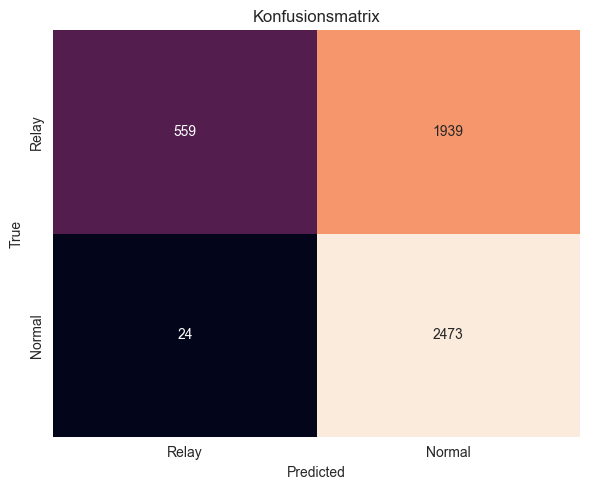

n neighbors: 50
metric: manhattan

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.72      2497
       Relay       0.96      0.23      0.37      2498

    accuracy                           0.61      4995
   macro avg       0.76      0.61      0.54      4995
weighted avg       0.76      0.61      0.54      4995



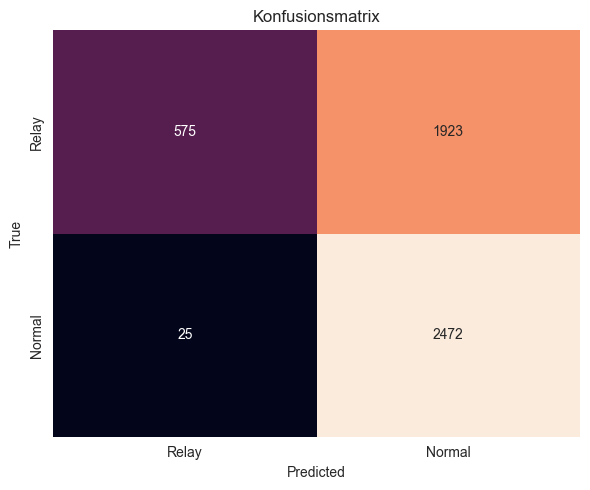

n neighbors: 5
metric: l2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.71      2497
       Relay       0.96      0.20      0.34      2498

    accuracy                           0.60      4995
   macro avg       0.76      0.60      0.53      4995
weighted avg       0.76      0.60      0.52      4995



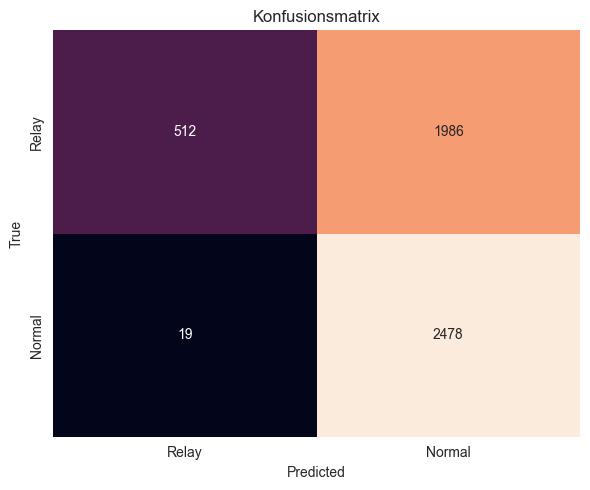

n neighbors: 5
metric: cityblock

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.71      2497
       Relay       0.96      0.21      0.34      2498

    accuracy                           0.60      4995
   macro avg       0.76      0.60      0.53      4995
weighted avg       0.76      0.60      0.53      4995



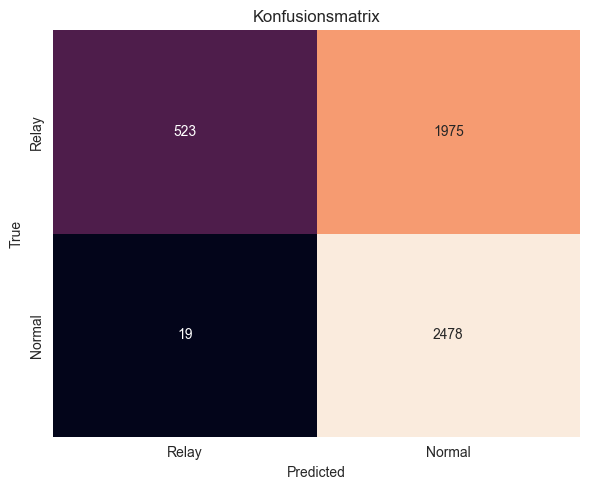

n neighbors: 5
metric: l1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.71      2497
       Relay       0.96      0.21      0.34      2498

    accuracy                           0.60      4995
   macro avg       0.76      0.60      0.53      4995
weighted avg       0.76      0.60      0.53      4995



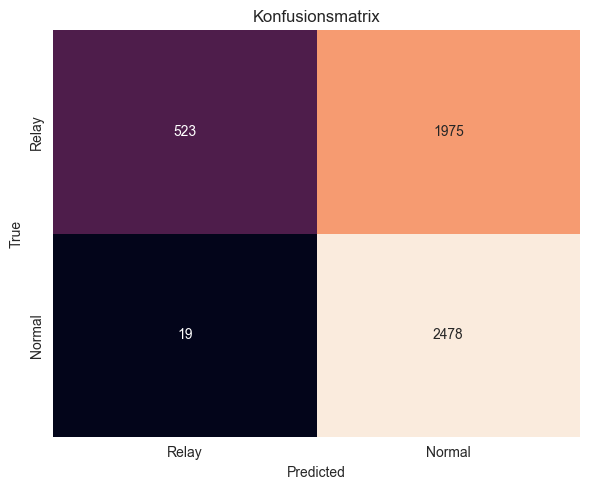

n neighbors: 5
metric: euclidean

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.71      2497
       Relay       0.96      0.20      0.34      2498

    accuracy                           0.60      4995
   macro avg       0.76      0.60      0.53      4995
weighted avg       0.76      0.60      0.52      4995



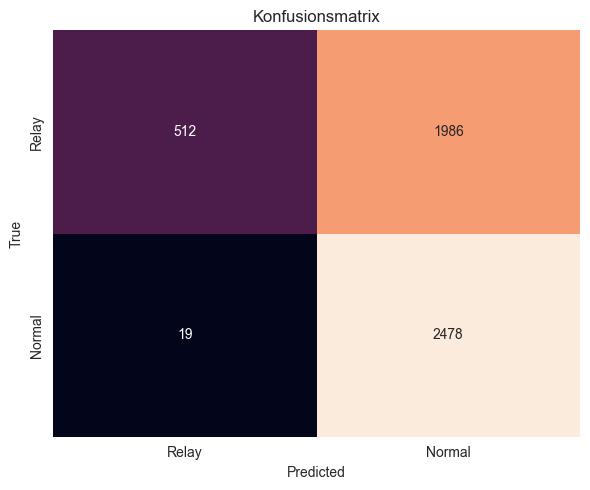

n neighbors: 5
metric: manhattan

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.71      2497
       Relay       0.96      0.21      0.34      2498

    accuracy                           0.60      4995
   macro avg       0.76      0.60      0.53      4995
weighted avg       0.76      0.60      0.53      4995



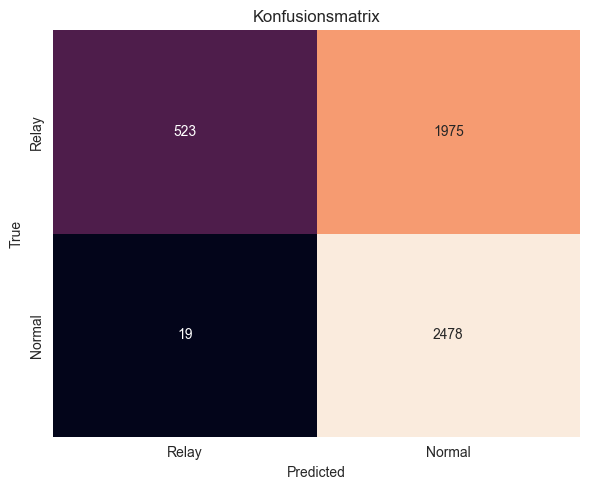

In [5]:
for n in {3,5,10,50}:
    for m in {"cityblock", "euclidean", "l1", "l2","manhattan"}:
        clf = KNN(contamination=0.01, n_neighbors=n, metric=m)
        clf.fit(X_train)

        # pyod.predict: 0 = inlier, 1 = outlier
        y_pred = clf.predict(X_test_combined)

        # cm und report
        cm = confusion_matrix(y_true, y_pred, labels=[1,0])
        print(f"n neighbors: {n}")
        print(f"metric: {m}")
        print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

        # plot
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt="d",
                    xticklabels=["Relay","Normal"],
                    yticklabels=["Relay","Normal"],
                    cbar=False)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title("Konfusionsmatrix")
        plt.tight_layout()
        plt.show()

n neighbors: 10
metric: l2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.71      2497
       Relay       0.95      0.22      0.36      2498

    accuracy                           0.60      4995
   macro avg       0.76      0.60      0.54      4995
weighted avg       0.76      0.60      0.54      4995



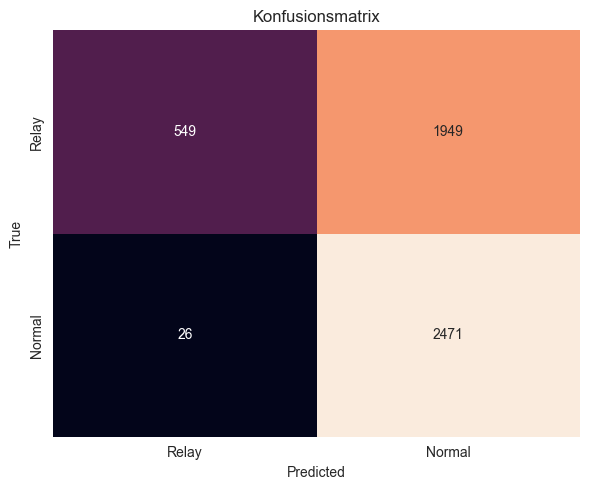

n neighbors: 10
metric: cityblock

Classification Report:
               precision    recall  f1-score   support

      Normal       0.58      0.99      0.73      2497
       Relay       0.97      0.28      0.44      2498

    accuracy                           0.64      4995
   macro avg       0.78      0.64      0.58      4995
weighted avg       0.78      0.64      0.58      4995



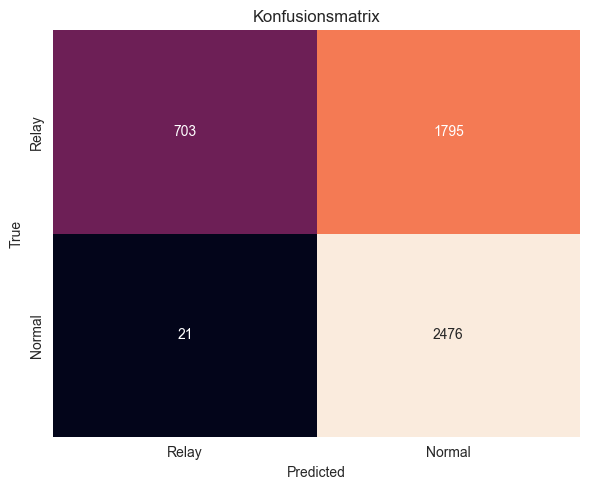

n neighbors: 10
metric: l1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.58      0.99      0.73      2497
       Relay       0.97      0.28      0.44      2498

    accuracy                           0.64      4995
   macro avg       0.78      0.64      0.58      4995
weighted avg       0.78      0.64      0.58      4995



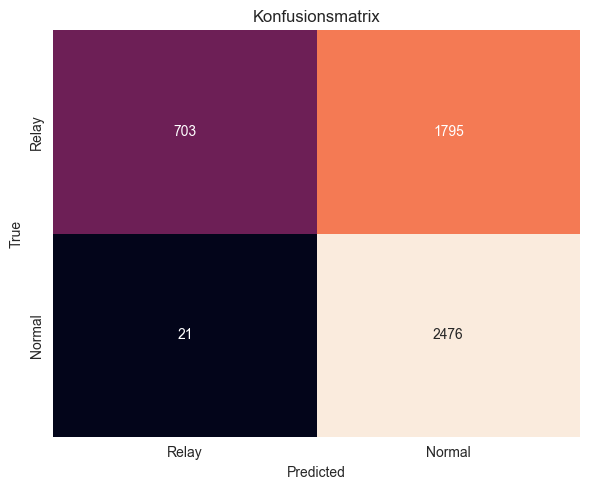

n neighbors: 10
metric: euclidean

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.71      2497
       Relay       0.95      0.22      0.36      2498

    accuracy                           0.60      4995
   macro avg       0.76      0.60      0.54      4995
weighted avg       0.76      0.60      0.54      4995



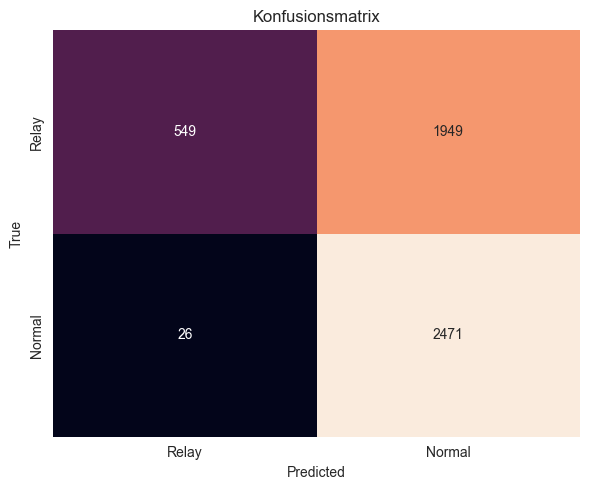

n neighbors: 10
metric: manhattan

Classification Report:
               precision    recall  f1-score   support

      Normal       0.58      0.99      0.73      2497
       Relay       0.97      0.28      0.44      2498

    accuracy                           0.64      4995
   macro avg       0.78      0.64      0.58      4995
weighted avg       0.78      0.64      0.58      4995



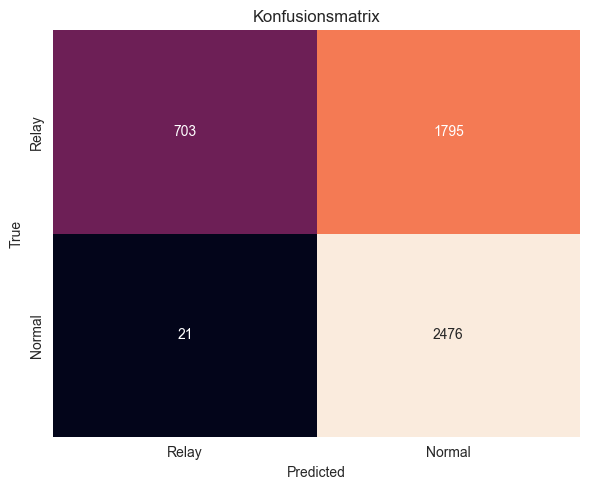

n neighbors: 3
metric: l2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.57      0.99      0.72      2497
       Relay       0.96      0.25      0.39      2498

    accuracy                           0.62      4995
   macro avg       0.77      0.62      0.56      4995
weighted avg       0.77      0.62      0.56      4995



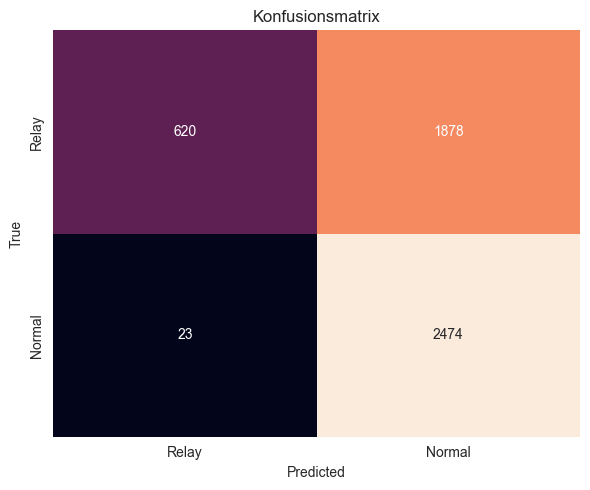

n neighbors: 3
metric: cityblock

Classification Report:
               precision    recall  f1-score   support

      Normal       0.58      0.99      0.73      2497
       Relay       0.97      0.28      0.43      2498

    accuracy                           0.64      4995
   macro avg       0.78      0.64      0.58      4995
weighted avg       0.78      0.64      0.58      4995



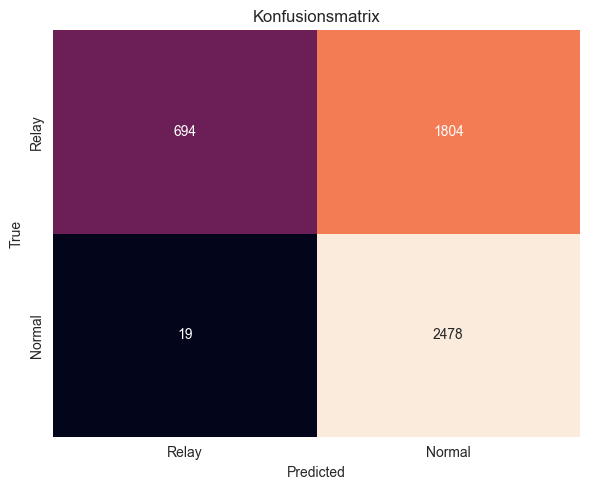

n neighbors: 3
metric: l1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.58      0.99      0.73      2497
       Relay       0.97      0.28      0.43      2498

    accuracy                           0.64      4995
   macro avg       0.78      0.64      0.58      4995
weighted avg       0.78      0.64      0.58      4995



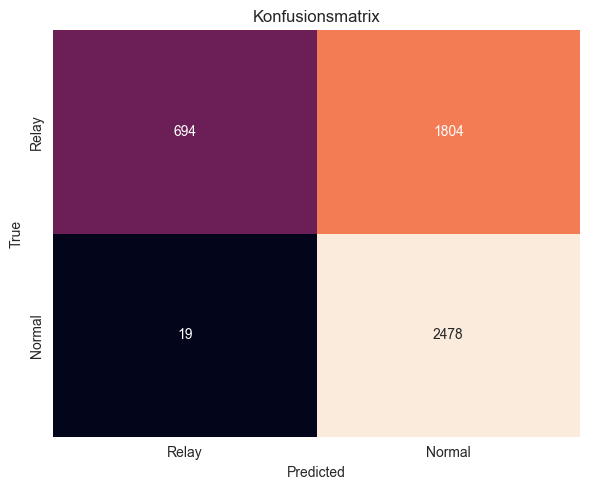

n neighbors: 3
metric: euclidean

Classification Report:
               precision    recall  f1-score   support

      Normal       0.57      0.99      0.72      2497
       Relay       0.96      0.25      0.39      2498

    accuracy                           0.62      4995
   macro avg       0.77      0.62      0.56      4995
weighted avg       0.77      0.62      0.56      4995



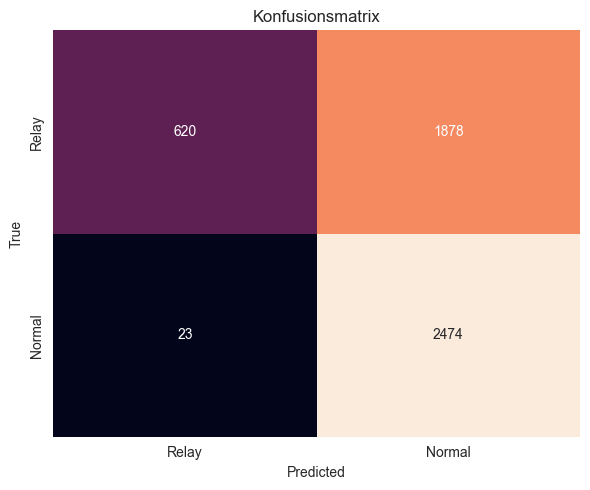

n neighbors: 3
metric: manhattan

Classification Report:
               precision    recall  f1-score   support

      Normal       0.58      0.99      0.73      2497
       Relay       0.97      0.28      0.43      2498

    accuracy                           0.64      4995
   macro avg       0.78      0.64      0.58      4995
weighted avg       0.78      0.64      0.58      4995



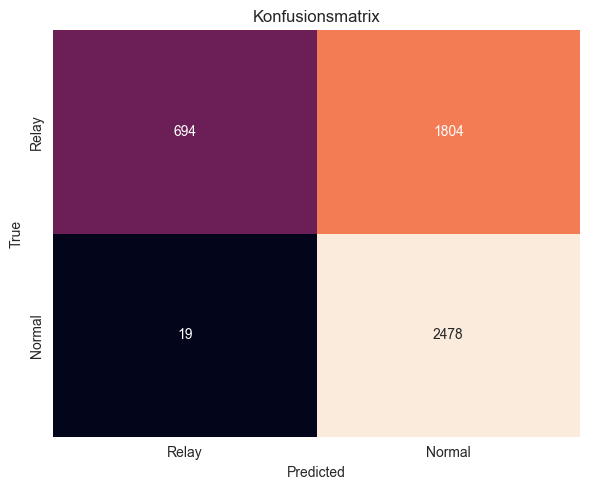

n neighbors: 50
metric: l2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.55      0.99      0.71      2497
       Relay       0.96      0.19      0.32      2498

    accuracy                           0.59      4995
   macro avg       0.76      0.59      0.51      4995
weighted avg       0.76      0.59      0.51      4995



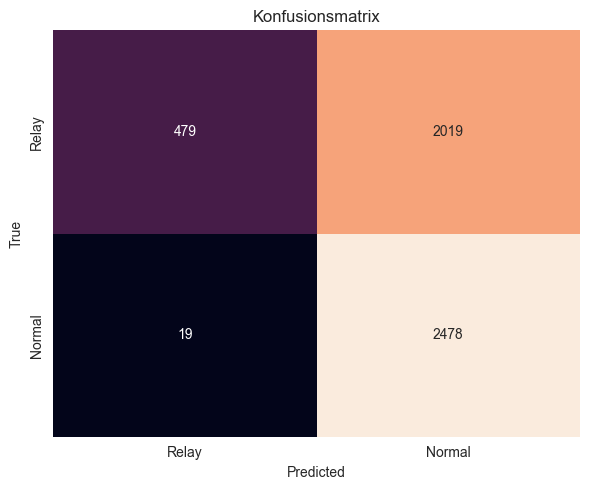

n neighbors: 50
metric: cityblock

Classification Report:
               precision    recall  f1-score   support

      Normal       0.58      0.99      0.73      2497
       Relay       0.97      0.28      0.43      2498

    accuracy                           0.63      4995
   macro avg       0.77      0.63      0.58      4995
weighted avg       0.77      0.63      0.58      4995



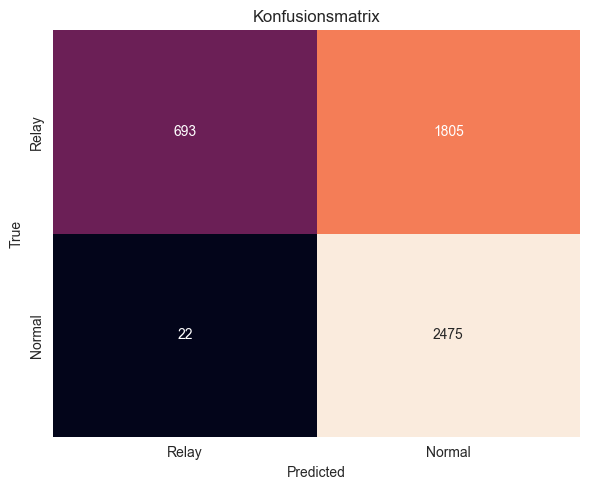

n neighbors: 50
metric: l1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.58      0.99      0.73      2497
       Relay       0.97      0.28      0.43      2498

    accuracy                           0.63      4995
   macro avg       0.77      0.63      0.58      4995
weighted avg       0.77      0.63      0.58      4995



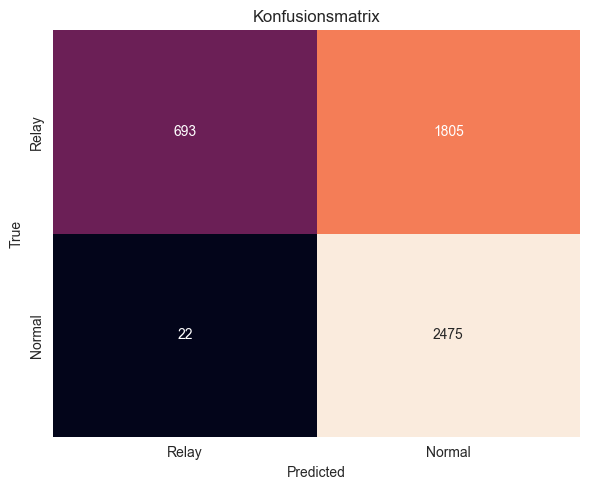

n neighbors: 50
metric: euclidean

Classification Report:
               precision    recall  f1-score   support

      Normal       0.55      0.99      0.71      2497
       Relay       0.96      0.19      0.32      2498

    accuracy                           0.59      4995
   macro avg       0.76      0.59      0.51      4995
weighted avg       0.76      0.59      0.51      4995



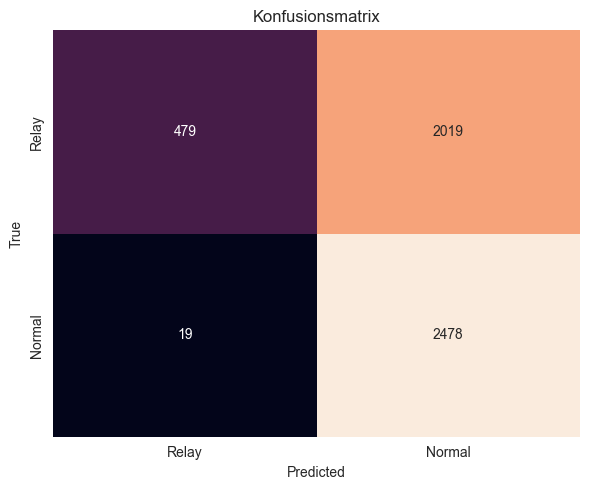

n neighbors: 50
metric: manhattan

Classification Report:
               precision    recall  f1-score   support

      Normal       0.58      0.99      0.73      2497
       Relay       0.97      0.28      0.43      2498

    accuracy                           0.63      4995
   macro avg       0.77      0.63      0.58      4995
weighted avg       0.77      0.63      0.58      4995



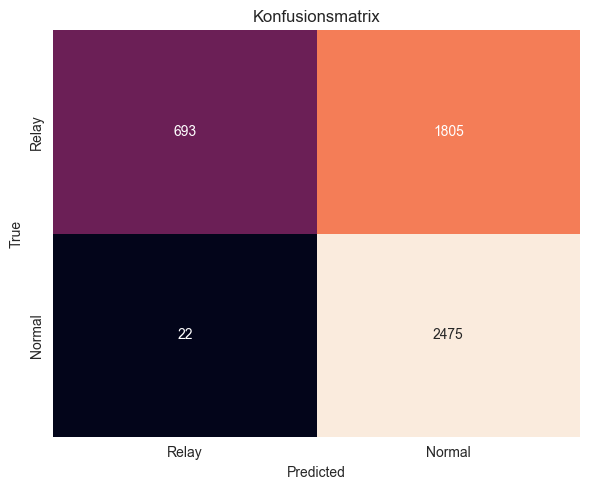

n neighbors: 5
metric: l2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.72      2497
       Relay       0.96      0.24      0.38      2498

    accuracy                           0.61      4995
   macro avg       0.76      0.61      0.55      4995
weighted avg       0.76      0.61      0.55      4995



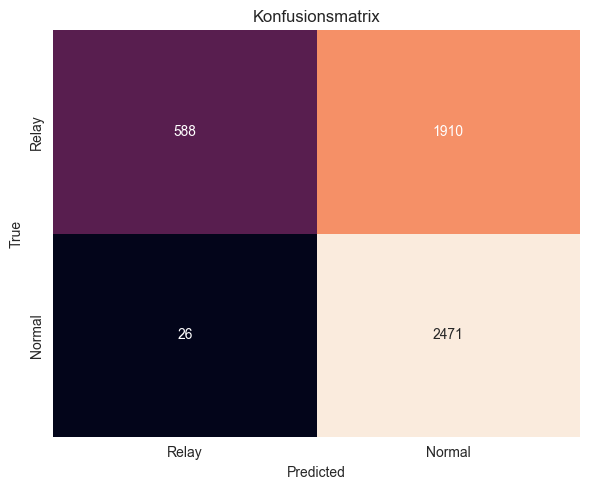

n neighbors: 5
metric: cityblock

Classification Report:
               precision    recall  f1-score   support

      Normal       0.58      0.99      0.73      2497
       Relay       0.97      0.28      0.43      2498

    accuracy                           0.63      4995
   macro avg       0.77      0.63      0.58      4995
weighted avg       0.77      0.63      0.58      4995



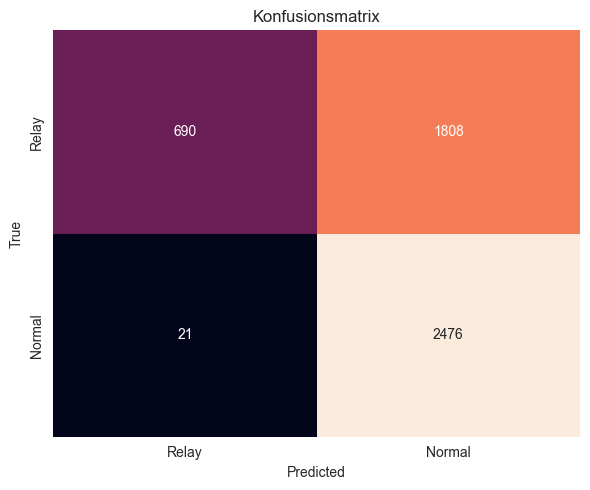

n neighbors: 5
metric: l1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.58      0.99      0.73      2497
       Relay       0.97      0.28      0.43      2498

    accuracy                           0.63      4995
   macro avg       0.77      0.63      0.58      4995
weighted avg       0.77      0.63      0.58      4995



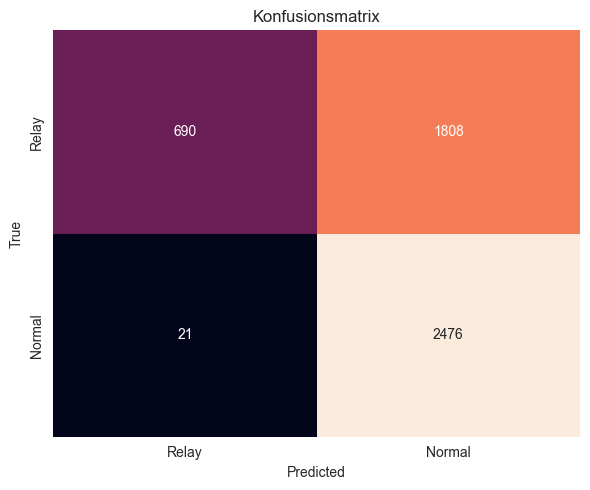

n neighbors: 5
metric: euclidean

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.72      2497
       Relay       0.96      0.24      0.38      2498

    accuracy                           0.61      4995
   macro avg       0.76      0.61      0.55      4995
weighted avg       0.76      0.61      0.55      4995



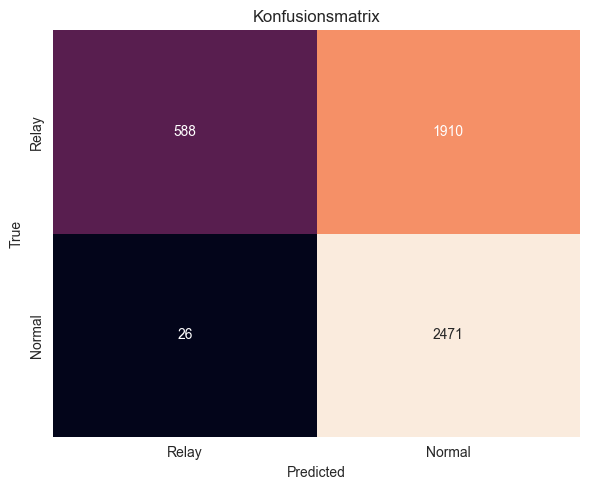

n neighbors: 5
metric: manhattan

Classification Report:
               precision    recall  f1-score   support

      Normal       0.58      0.99      0.73      2497
       Relay       0.97      0.28      0.43      2498

    accuracy                           0.63      4995
   macro avg       0.77      0.63      0.58      4995
weighted avg       0.77      0.63      0.58      4995



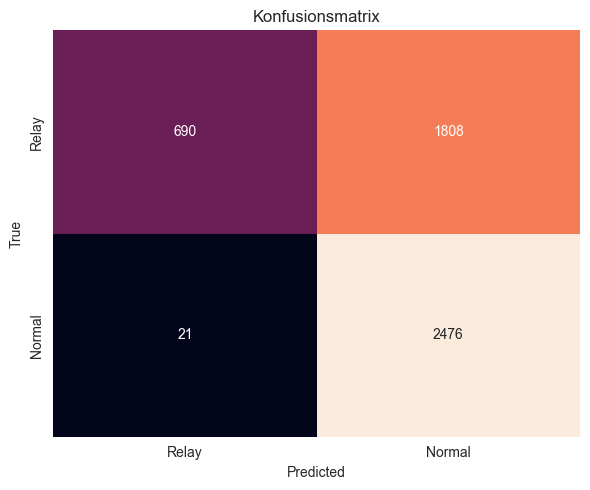

In [6]:
for n in {3,5,10,50}:
    for m in {"cityblock", "euclidean", "l1", "l2","manhattan"}:
        clf = KNN(contamination=0.01, n_neighbors=n, metric=m)
        clf.fit(X_train_scaled_standard)

        # pyod.predict: 0 = inlier, 1 = outlier
        y_pred = clf.predict(X_test_combined_scaled_standard)

        # cm und report
        cm = confusion_matrix(y_true, y_pred, labels=[1,0])
        print(f"n neighbors: {n}")
        print(f"metric: {m}")
        print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

        # plot
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt="d",
                    xticklabels=["Relay","Normal"],
                    yticklabels=["Relay","Normal"],
                    cbar=False)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title("Konfusionsmatrix")
        plt.tight_layout()
        plt.show()

n neighbors: 10
metric: l2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.55      0.99      0.71      2497
       Relay       0.96      0.20      0.33      2498

    accuracy                           0.59      4995
   macro avg       0.76      0.59      0.52      4995
weighted avg       0.76      0.59      0.52      4995



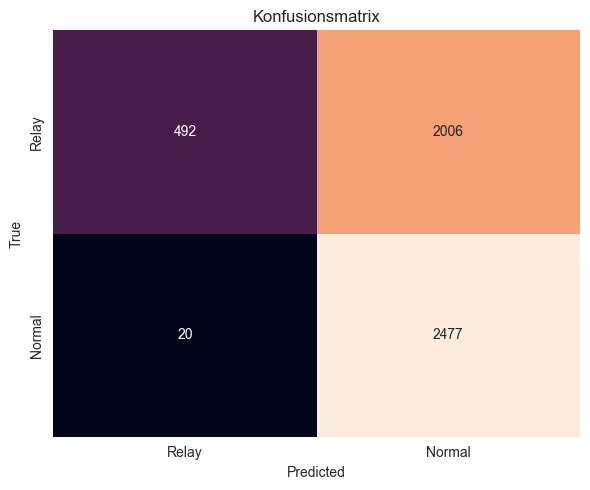

n neighbors: 10
metric: cityblock

Classification Report:
               precision    recall  f1-score   support

      Normal       0.57      0.99      0.73      2497
       Relay       0.97      0.26      0.41      2498

    accuracy                           0.63      4995
   macro avg       0.77      0.63      0.57      4995
weighted avg       0.77      0.63      0.57      4995



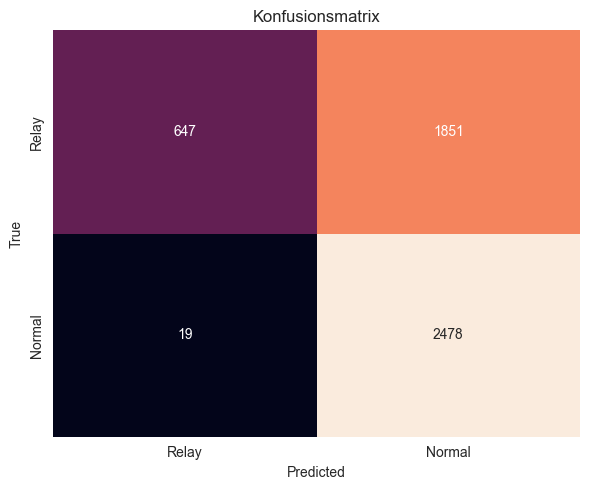

n neighbors: 10
metric: l1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.57      0.99      0.73      2497
       Relay       0.97      0.26      0.41      2498

    accuracy                           0.63      4995
   macro avg       0.77      0.63      0.57      4995
weighted avg       0.77      0.63      0.57      4995



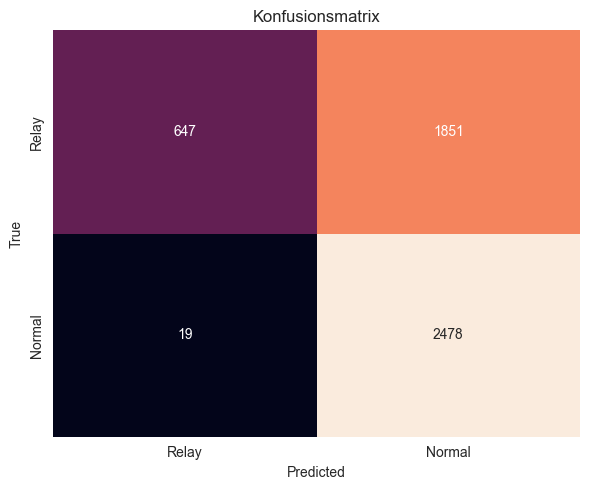

n neighbors: 10
metric: euclidean

Classification Report:
               precision    recall  f1-score   support

      Normal       0.55      0.99      0.71      2497
       Relay       0.96      0.20      0.33      2498

    accuracy                           0.59      4995
   macro avg       0.76      0.59      0.52      4995
weighted avg       0.76      0.59      0.52      4995



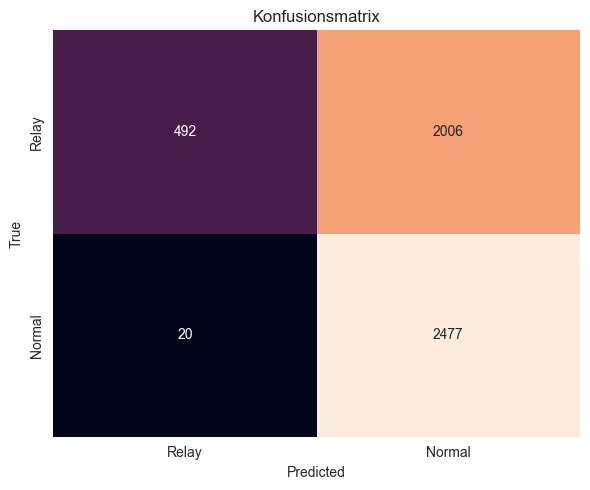

n neighbors: 10
metric: manhattan

Classification Report:
               precision    recall  f1-score   support

      Normal       0.57      0.99      0.73      2497
       Relay       0.97      0.26      0.41      2498

    accuracy                           0.63      4995
   macro avg       0.77      0.63      0.57      4995
weighted avg       0.77      0.63      0.57      4995



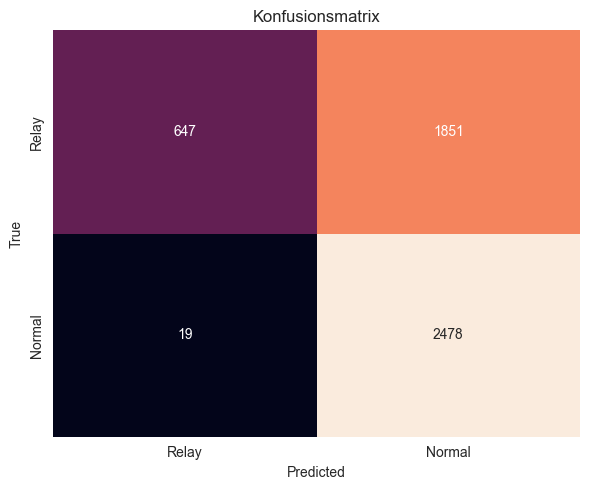

n neighbors: 3
metric: l2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.71      2497
       Relay       0.96      0.22      0.36      2498

    accuracy                           0.60      4995
   macro avg       0.76      0.60      0.54      4995
weighted avg       0.76      0.60      0.54      4995



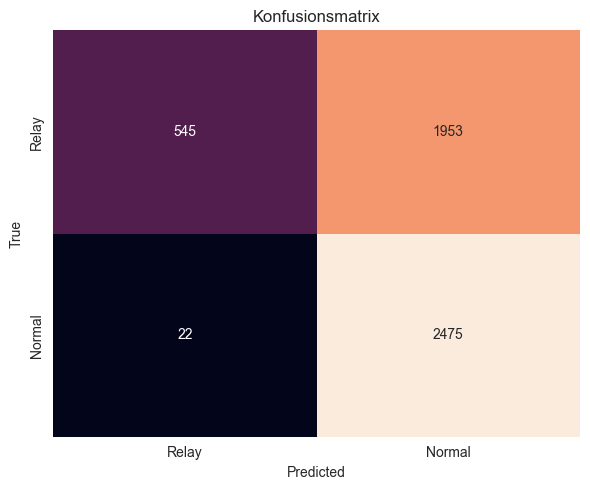

n neighbors: 3
metric: cityblock

Classification Report:
               precision    recall  f1-score   support

      Normal       0.57      0.99      0.73      2497
       Relay       0.97      0.26      0.41      2498

    accuracy                           0.62      4995
   macro avg       0.77      0.62      0.57      4995
weighted avg       0.77      0.62      0.57      4995



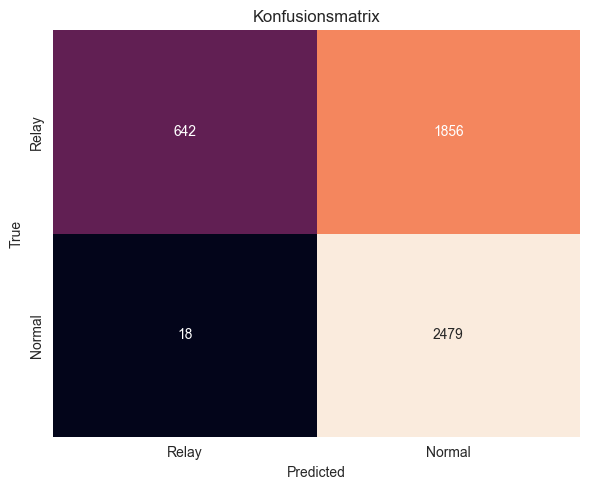

n neighbors: 3
metric: l1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.57      0.99      0.73      2497
       Relay       0.97      0.26      0.41      2498

    accuracy                           0.62      4995
   macro avg       0.77      0.62      0.57      4995
weighted avg       0.77      0.62      0.57      4995



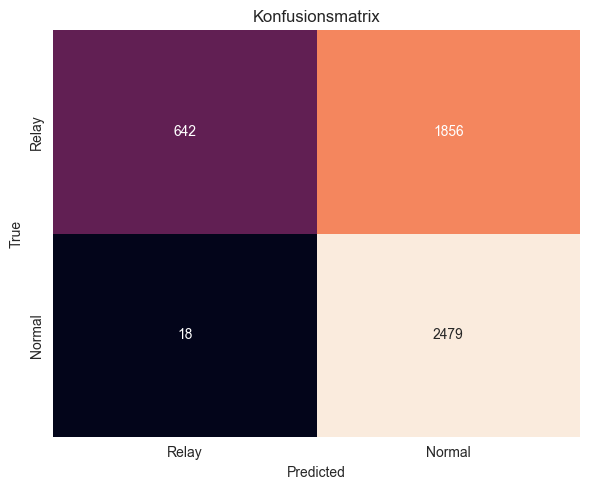

n neighbors: 3
metric: euclidean

Classification Report:
               precision    recall  f1-score   support

      Normal       0.56      0.99      0.71      2497
       Relay       0.96      0.22      0.36      2498

    accuracy                           0.60      4995
   macro avg       0.76      0.60      0.54      4995
weighted avg       0.76      0.60      0.54      4995



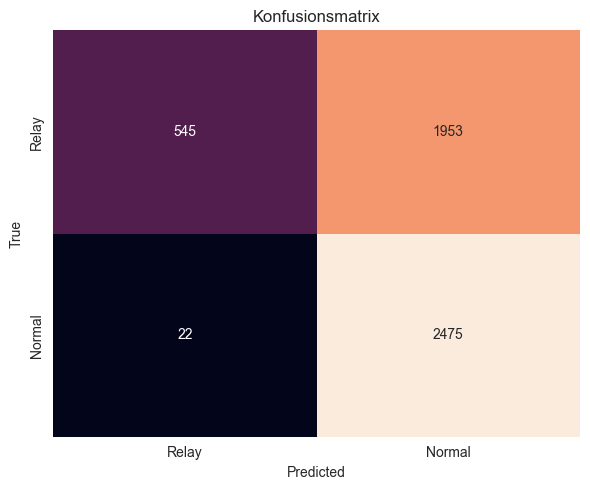

KeyboardInterrupt: 

In [7]:
for n in {3,5,10,50}:
    for m in {"cityblock", "euclidean", "l1", "l2","manhattan"}:
        clf = KNN(contamination=0.01, n_neighbors=n, metric=m)
        clf.fit(X_train_scaled_minmax)

        # pyod.predict: 0 = inlier, 1 = outlier
        y_pred = clf.predict(X_test_combined_scaled_minmax)

        # cm und report
        cm = confusion_matrix(y_true, y_pred, labels=[1,0])
        print(f"n neighbors: {n}")
        print(f"metric: {m}")
        print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

        # plot
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt="d",
                    xticklabels=["Relay","Normal"],
                    yticklabels=["Relay","Normal"],
                    cbar=False)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title("Konfusionsmatrix")
        plt.tight_layout()
        plt.show()